# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Unsupervised Learning
- Although most of the applications of Machine Learning today are based on supervised learning, the vast majority of the available data is actually **unlabeled**: we have the input features X, but we do not have the labels y.
- This is where **unsupervised learning** techniques come into play.

# Clustering
- Clustering is the task of **identifying similar instances** and **assigning them to clusters**, i.e., groups of similar instances.
- Clustering is an **unsupervised task**.

## K-Means
- Let's start by generating some blobs.

In [2]:
from sklearn.datasets import make_blobs

In [3]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [4]:
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

In [5]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel('$x_1$', fontsize=4)
    plt.ylabel('$x_2$', fontsize=4, rotation=0)

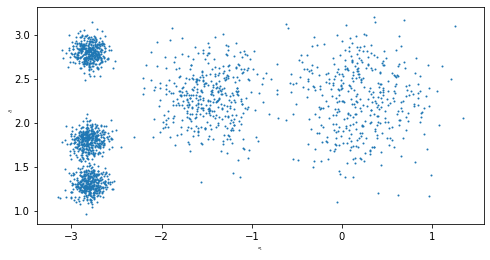

In [6]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

- Fit K-Means and Predict
    - Let's train a K-Means clusterer on this dataset.
    - It'll try to find each blob's center and assign each instance to the closest blob.
    - We can use class **`KMeans`** from `sklearn.cluster`.
        - `n_clusters` specifies the number of centers.

In [7]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)

In [8]:
y_pred

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

- We can use the `labels_` variable to see the labels assigend by the K-Means model.

In [9]:
y_pred is kmeans.labels_

True

- We can use the `cluster_centers_` variable to get the **centroids** found by the model.

In [10]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

- Then, we can predict the lables of new instances.

In [11]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

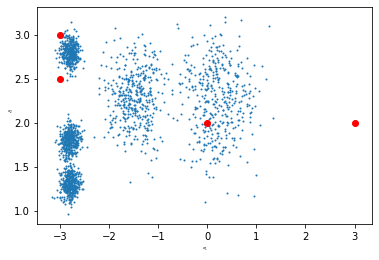

In [12]:
plot_clusters(X)
plt.scatter(X_new[:,0], X_new[:,1], c='r')

- Decision Boundaries
    - Let's plot the model's decision boundaries.

In [13]:
def plot_data(X):
    plt.plot(X[:,0], X[:,1], 'k.', markersize=2)
    
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, 
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

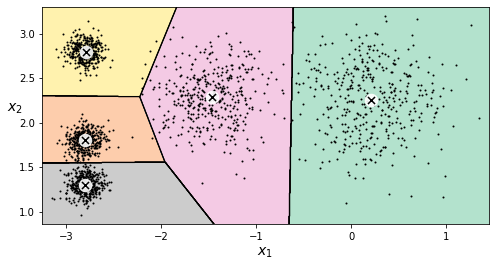

In [14]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)

- **Hard Clustering** vs. **Soft Clustering**
    - Assigning each instance to a single cluster is called hard clustering. 
    - Giving each instance a score per cluster is called soft clustering.
        - The score can be the distance between the instance and the centroid, or conversely it can be a similarity score (or affinity) such as the Gaussian Radial Basis Function. 
    - In the `KMeans` class, the `transform()` method measures the distance from each instance to every centroid.

In [15]:
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

- We can verify that this indeed is the Euclidian distance between each instance and each centroid.

In [16]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

- **K-Means Algorithm**
    - The centroids are initialized randomly.
    - Then the instances are labeled. 
    - Then the centroids are updated.
    - The instances are relabeled, and so on.
- Unfortunately, although the algorithm is guaranteed to converge, it may not converge to the right solution (i.e., it may converge to a local optimum): this depends on the centroid initialization.

- **Centroid Initialization Methods**
    - If you happen to know approximately where the centroids should be (e.g., if you ran another clustering algorithm earlier), then you can set the **`init` hyperparameter** to a NumPy array containing the list of centroids, and **set `n_init` to 1**.

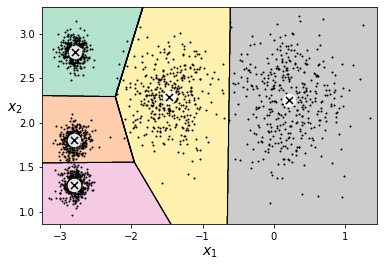

In [17]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
y_pred = kmeans.fit_predict(X)

plot_decision_boundaries(kmeans, X)

- Another solution is to run the algorithm multiple times with different random initializations and keep the best solution. 
- This is controlled by the `n_init` hyperparameter.
    - By default, it is equal to 10, which means that the whole algorithm described earlier actually runs 10 times when you call `fit()`, and Scikit-Learn keeps the best solution.
- K-Menas uses a performance metric called the model’s **inertia**: this is the mean squared distance between each instance and its closest centroid. 
- **The `KMeans` class runs the algorithm `n_init` times and keeps the model with the lowest inertia**.

In [18]:
kmeans.inertia_

211.5985372581684

- As you can easily verify, **inertia** is the **sum of the squared distances between each training instance and its closest centroid**.

In [19]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

- **K-Means+\+**
    - Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm:
        - Take one centoid $c_1$, chosen uniformly at random from the dataset.
        - Take a new center $c_i$, choosing an instance $x_i$ with probability: $D(x_i)^2 / \sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$.
            - $D(x_i)$ is the distance between the instance $x_i$ and the closest centroid that was already chosen.
            - This probability distribution ensures that instances that are further away from already chosen centroids are much more likely to be selected as centroids.
        - Repeat the previous step until all $k$ centroids have been chosen.
    - The `KMeans` class actually uses this initialization method **by default**. 
        - If you want to force it to use the original method (i.e., picking k instances randomly to define the initial centroids), then you can set the `init` hyperparameter to **"random"**, which you'll rarely do.

- **Accelerated K-Means**
    - The K-Means algorithm can be significantly accelerated by avoiding many unnecessary distance calculations.
        - This is achieved by exploiting the triangle inequality and by keeping track of lower and upper bounds for distances between instances and centroids.
    - To use Accelerated K-Means, we need to set `algorithm="elkan"`.
        - Note Sklearn uses "elkan" for dense data and "full" (original K-Means algorithm) for sparse data by defualt.

In [20]:
%timeit -n 50 KMeans(algorithm='elkan').fit(X)

64.3 ms ± 2.69 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [21]:
%timeit -n 50 KMeans(algorithm='full').fit(X)

95.4 ms ± 1.53 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


- **Mini-Batch K-Means**
    - Instead of using the full dataset at each iteration, the Mini-Batch K-Means algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration.
    - This speeds up the algorithm typically by a factor of 3 or 4 and makes it possible to cluster huge datasets that do not fit in memory. 
    - Scikit-Learn implements this algorithm in the **`MiniBatchKMeans` class** from `sklearn.cluster`.

In [22]:
from sklearn.cluster import MiniBatchKMeans

In [23]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [24]:
minibatch_kmeans.inertia_

211.93186531476775

- If the dataset does not fit in memory, the simplest option is to use the **memmap** class, just like we did for incremental PCA.
- We'll try using it on the MNIST dataset.

In [25]:
import urllib
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'], random_state=42)

- Now, let's write it to a memmap.

In [27]:
# filename = 'my_mnist.data'

# X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
# X_mm[:] = X_train

In [28]:
# minibatch_kmeans = MiniBatchKMeans(n_clusters=5, batch_size=10, random_state=42)
# minibatch_kmeans.fit(X_mm)

- Let's compare the speed of regular K-Means and Mini-Batch K-Means.

In [29]:
%timeit KMeans(n_clusters=5).fit(X)

35.6 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

23.9 ms ± 1.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


- As we can see from above, Mini-Batch K-Means is much faster.
- However, its performance is often lower (i.e. higher inertia), and it keeps degrading as $k$ increases.

In [31]:
from timeit import timeit

In [32]:
times = np.empty((100, 2))
inertias = np.empty((100,2))

for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end='')
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 0] = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

[1, 100, 0, 6]

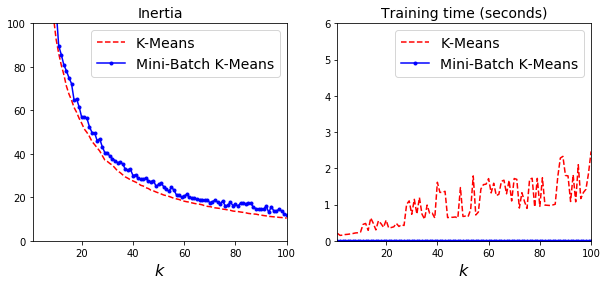

In [33]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], 'r--', label='K-Means')
plt.plot(range(1, 101), inertias[:, 1], 'b.-', label='Mini-Batch K-Means')
plt.xlabel('$k$', fontsize=16)
plt.title('Inertia', fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], 'r--', label='K-Means')
plt.plot(range(1, 101), times[:, 1], 'b.-', label='Mini-Batch K-Means')
plt.xlabel('$k$', fontsize=16)
plt.title('Training time (seconds)', fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 6])

- Finding the **optimal number of clusters**
    - So far, we've set $k=5$.
    - What if the number of clusters was set to a lower or greater value than 5?

In [34]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)
    
    plt.figure(figsize=(10, 3.2))
    
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)
        
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

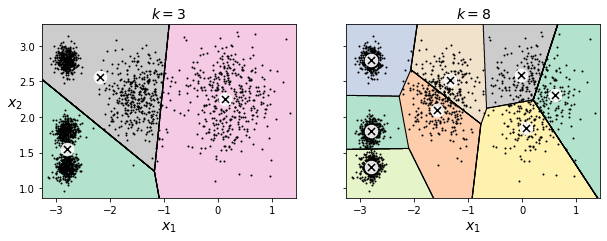

In [35]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")

In [36]:
kmeans_k3.inertia_, kmeans_k8.inertia_

(653.2167190021553, 118.41983763508077)

- Now, let's try plotting the inertia as a function of $k$ and analyze the resulting curve.

In [37]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

[1, 8.5, 0, 1300]

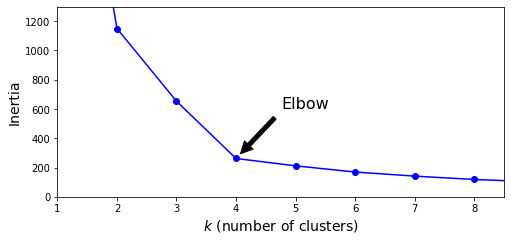

In [38]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, 'bo-')
plt.xlabel('$k$ (number of clusters)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.annotate('Elbow', xy=(4, inertias[3]), xytext=(0.55, 0.55), textcoords='figure fraction',
            fontsize=16, arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([1, 8.5, 0, 1300])

- From above, we can see that there is an elbow at $k=4$, which means that less clusters than 4 would be bad, and more clusters than 4 would not help much in reducing inertia and might cut clusters in half.
- Thus, $k=4$ is a pretty good choice.

- Another approach is to look at the **silhouette score**, which is the mean **silhouette coefficient** over all the instances. 
    - An instance's silhouette coefficient is equal to $(b - a)/\max(a, b)$, where $a$ is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and $b$ is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). 
    - The silhouette coefficient can vary between -1 and +1.
        - A coefficient **close to +1** means that the instance is **well inside** its own cluster and far from other clusters.
        - A coefficient **close to 0** means that it is close to a **cluster boundary**.
        - A coefficient **close to -1** means that the instance may have been assigned to the **wrong cluster**.
- Now, let's plot the sihouette score as a function of $k$.

In [39]:
from sklearn.metrics import silhouette_score

In [40]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [41]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

[1.8, 8.5, 0.55, 0.7]

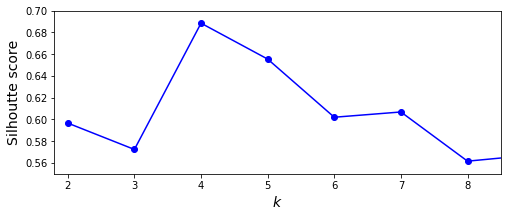

In [42]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Silhoutte score', fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])

- As we can see, this visualization is more informative than the one based on plotting out inertia.
    - Besides confirming that $k=4$ is a very good choice, it also underlines the fact that $k=5$ is quite good as well.

- **Limits of K-Means**
    - Despite its many merits, most notably being fast and scalable, K-Means is not perfect.
    - As we saw, it is necessary to run the algorithm several times to avoid sub-optimal solutions, plus you need to specify the number of clusters, which can be quite a hassle. 
    - Moreover, K-Means does not behave very well when the clusters have varying sizes, different densities, or non-spherical shapes.

In [43]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95],[0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

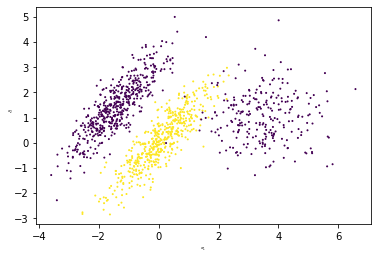

In [44]:
plot_clusters(X, y)

In [45]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                    n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)

kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Inertia = 2179.7')

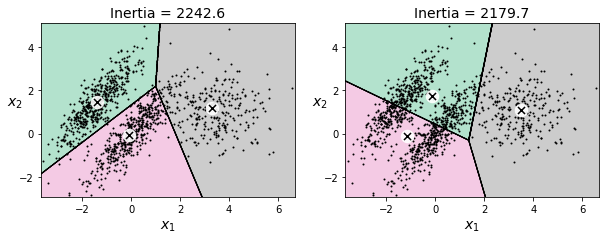

In [46]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

## Using Clustering for Image Segmentation
- **Image segmentation** is the task of partitioning an image into multiple segments.
- Here, we are going to do something much simpler: **color segmentation**. 
    - We will simply assign pixels to the same segment if they have a similar color.

In [47]:
# import os
# from settings import PROJECT_ROOT

In [48]:
# images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
# os.makedirs(images_path, exist_ok=True)
# DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
# filename = "ladybug.png"
# print("Downloading", filename)
# url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
# urllib.request.urlretrieve(url, os.path.join(images_path, filename))

In [49]:
# from matplotlib.image import imread
# image = imread(os.path.join(images_path, filename))
# image.shape

In [50]:
# X = image.reshape(-1, 3)
# kmeans = KMeans(n_clusters=8, random_state=2).fit(X)
# segmented_img = kmeans.cluster_centers_[kmeans.labels_]
# segmented_img = segmented_img.reshape(image.shape)

In [51]:
# plt.figure(figsize=(10,5))
# plt.subplots_adjust(wspace=0.05, hspace=0.1)

# plt.subplot(231)
# plt.imshow(image)
# plt.title("Original image")
# plt.axis('off')

# for idx, n_clusters in enumerate(n_colors):
#     plt.subplot(232 + idx)
#     plt.imshow(segmented_imgs[idx])
#     plt.title("{} colors".format(n_clusters))
#     plt.axis('off')

- Using Clutering for Preprocessing
    - Let's tackle the *digits* dataset, which is a simple MNIST-like dataset containing 1797 grayscale 8x8 images representing digits 0 to 9.

In [52]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9688888888888889

- Let's see if we can do better by using **K-Means** as a preprocessing step.

In [55]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50, random_state=42)),
    ('log_reg', LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [56]:
pipeline.score(X_test, y_test)

0.98

- Now, let's try to find the optimal number of clusters $k$.

In [57]:
from sklearn.model_selection import GridSearchCV

params_grid = {'kmeans__n_clusters': range(2, 100)}

grid_clf = GridSearchCV(pipeline, params_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[CV] ............................ kmeans__n_clusters=21, total=   1.6s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.0s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   1.9s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   1.8s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   1.8s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   1.8s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   1.7s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=41, total=   2.4s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   2.6s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   2.5s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   2.5s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   2.5s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   2.6s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   2.4s
[CV] kmeans__n_clusters=43 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=60, total=   3.1s
[CV] kmeans__n_clusters=60 ...........................................
[CV] ............................ kmeans__n_clusters=60, total=   2.8s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   2.7s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   3.3s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   2.5s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   2.9s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   3.3s
[CV] kmeans__n_clusters=62 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=79, total=   2.9s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   3.3s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   3.0s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   3.0s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   3.0s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   3.3s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   3.0s
[CV] kmeans__n_clusters=82 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=99, total=   3.5s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   3.5s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   3.2s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 11.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                      

In [58]:
grid_clf.best_params_

{'kmeans__n_clusters': 57}

In [59]:
grid_clf.best_estimator_.score(X_test, y_test)

0.98

## Using Clustering for Semi-Supervised Learning
- Another use case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances.
- Let's assume that we only have 50 labeled instances and train the model based them.

In [60]:
n_labeled = 50

In [61]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

- Obviously, it's much less than earlier.
- Let's see how can we do better.
- First, let's cuslter the training set into 50 clusters, then for each cluster let's find the image closest to the centroid. We'll call these images the representative images.

In [62]:
k = 50

In [63]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

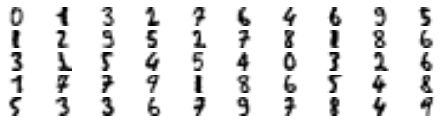

In [64]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k//10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap='binary', interpolation='bilinear')
    plt.axis('off')

In [65]:
y_representative_digits = np.array([
    0,1,3,2,7,6,4,6,9,5,
    1,2,3,5,2,7,8,8,8,6,
    3,1,5,4,5,4,0,3,2,6,
    1,7,7,9,1,8,6,5,4,8,
    5,3,3,6,7,9,7,8,4,9
])

- Now, let's try to train the Logistic Regression model using these 50 representative instances.

In [66]:
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8755555555555555

- Now, let's take one step further, labeling all instances in each cluster with the representative digit.

In [67]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)

for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [68]:
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9066666666666666

- The result has been improved again.
- Let's take one more step further, by only propaga the labels to the 20th percentile closest to the centroids. 

In [69]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [70]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [71]:
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8844444444444445

## DBSCAN
- This algorithm defines **clusters** as **continuous regions of high density**. 
- It is actually quite simple:
    - For each instance, the algorithm counts how many instances are located within a small distance $\epsilon$ (epsilon) from it. 
        - This region is called the instance’s **$\epsilon$-neighborhood**.
    - If an instance has at least **min_samples** instances in its ε-neighborhood (including itself), then it is considered a core instance. 
        - In other words, core instances are those that are located in dense regions.
    - All instances in the neighborhood of a core instance belong to the same cluster. 
        - This may include other core instances, therefore a long sequence of neighboring core instances forms a single cluster.
    - Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.
- We can apply this algorithm using the **DBSCAN** class in sklearn.cluster.

In [72]:
from sklearn.datasets import make_moons

In [73]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [74]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

- The labels of all the instances are now available in the `labels_ instance` variable.
    - Notice that some instances have a **cluster index equal to -1**: this means that they are considered as **anomalies** by the algorithm.

In [75]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

- The indices of the core instances are available in the `core_sample_indices_` instance variable.

In [76]:
len(dbscan.core_sample_indices_)

808

In [77]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

- The core instances themselves are available in the `components_` instance variable

In [78]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [79]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

- Now, let's compare using different values for $\epsilon$.

In [80]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [81]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

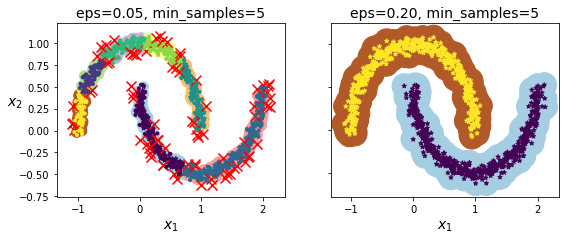

In [82]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

- The DBSCAN class does not have a `predict()` method, although it has a `fit_predict()` method. 
    - In other words, it cannot predict which cluster a new instance belongs to. 
- The rationale for this decision is that several classification algorithms could make sense here, and it is easy enough to train one, for example a **KNeighborsClassifier**.
- We then train the classier using the core samples found by the DBSCAN model.

In [83]:
dbscan = dbscan2

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [86]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

knn.predict(X_new)

array([1, 0, 1, 0])

In [87]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

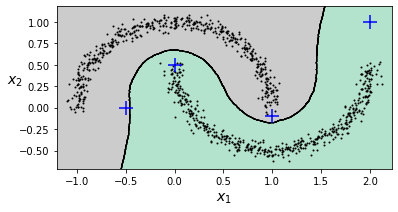

In [88]:
plt.figure(figsize=(6,3))

plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c='b', marker='+', s=200, zorder=10)

- Note that since the KNN is trained using core instances, i.e. there is no anormalies in the training set, it will not detect anormalies in predictions either.
- Here, we can manually find the **anormalies** by setting a maximum distance.
- We can use the `kneighbors()` method of the **KNeighborsClassifier**: given a set of instances, it returns the distances and the indices of the k nearest neighbors in the training set.

In [89]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)

In [90]:
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]

In [91]:
y_pred[y_dist > 0.2] = -1

In [92]:
y_pred.ravel()

array([-1,  0,  1, -1])

- In short, DBSCAN is a very simple yet powerful algorithm, capable of identifying any number of clusters, of any shape, it is robust to outliers, and it has just two hyperparameters (`eps` and `min_samples`). 
- However, if the density varies significantly across the clusters, it can be impossible for it to capture all the clusters properly.

# Gaussian Mixtures
- A **Gaussian mixture model (GMM)** is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown.
- The input dataset X is assumed to have been generated through the following probabilistic process:
    - For each instance, a cluster is picked randomly among **k clusters**. 
        - The probability of choosing the $j^{th}$ cluster is defined by the **cluster’s weight** $\phi^{(j)}$.
        - The index of the cluster chosen for the $i^{th}$ instance is noted $z^{(i)}$.
    - If $z^{(i)}=j$, meaning the $i^{th}$ instance has been assigned to the $jth$ cluster, the location $x^{(i)}$ of this instance is sampled randomly from the **Gaussian distribution with mean $\mu^{(j)}$ and covariance matrix $\Sigma^{(j)}$**.
        - This is noted as $x \sim N(\mu^{(j)}, \Sigma^{(j)})$.
- We can impletement the Gaussian Mixture model using the **`GaussianMixture` class** from `sklearn.mixture`.

In [93]:
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]

X = np.r_[X1, X2]
y = np.r_[y1, y2]

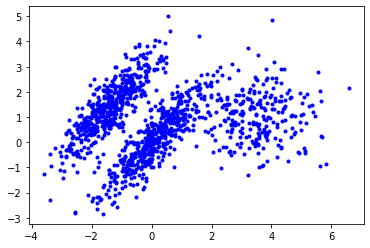

In [94]:
plt.plot(X[:, 0], X[:, 1], 'b.')

- Let's train a Gaussian Mixture model on the previous dataset.
    - The Gaussian Mixture class relies on the **Expectation-Maximization (EM)** algorithm, which can be thought as a generalization of K-Means that not only finds the cluster centers ($\mu^{(1)}$ to $\mu^{(k)}$) but also their size, shape, and orientation ($\Sigma^{(1)}$ to $\Sigma^{(k)}$), as well as their weights ($\sigma^{(1)}$ to $\sigma^{(k)}$).
    - Unfortunately, just like K-Means, EM can end up converging to poor solutions, so it needs to be run several times, keeping only the best solution. 
        - This is why we set `n_init=10`. Be careful: by default `n_init` is only set to 1.

In [95]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [96]:
gm.weights_

array([0.39032584, 0.20961444, 0.40005972])

In [97]:
gm.means_

array([[ 0.05145113,  0.07534576],
       [ 3.39947665,  1.05931088],
       [-1.40764129,  1.42712848]])

In [98]:
gm.covariances_

array([[[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]]])

- We can check whether the algorithm actually converged.

In [99]:
gm.converged_

True

In [100]:
gm.n_iter_

4

- You can now use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster. 
    - For this, just use `predict()` method or the `predict_proba()` method:

In [101]:
gm.predict(X)

array([0, 0, 2, ..., 1, 1, 1])

In [102]:
gm.predict_proba(X)

array([[9.76815996e-01, 2.31833274e-02, 6.76282339e-07],
       [9.82914418e-01, 1.64110061e-02, 6.74575575e-04],
       [7.52377580e-05, 1.99781831e-06, 9.99922764e-01],
       ...,
       [4.31902443e-07, 9.99999568e-01, 2.12540639e-26],
       [5.20915318e-16, 1.00000000e+00, 1.45002917e-41],
       [2.30971331e-15, 1.00000000e+00, 7.93266114e-41]])

- It is also possible to estimate the **density** of the model at any given location. 
- This is achieved using the `score_samples()` method: for each instance it is given, this method estimates the **log of the probability density function (PDF)** at that location.
    - The greater the score, the higher the density.

In [103]:
gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

- Let's check that the PDF integrates to 1 over the whole space.
    - We just take a large square around the clusters, and chop it into a grid of tiny squares, then we compite the approximate probability that the instances will be generated in each tiny square (by multiplying the PDF at one corner of the tiny square by the area of the square), and finally summing all these probabilities. 

In [104]:
resolution = 100
grid = np.arange(-10, 10, 1/resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

In [105]:
pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1/resolution) ** 2
pdf_probas.sum()

0.9999999999225095

- Now, let's plot the resulting decision boundaries (dashed lines) and density contours.

In [106]:
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=mpl.colors.LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=mpl.colors.LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

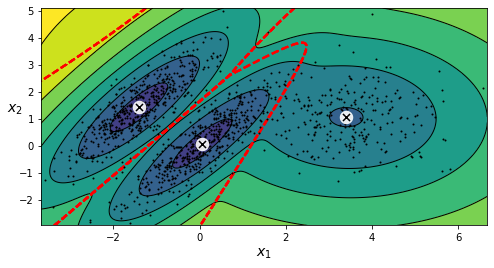

In [107]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

- Nice! The algorithm clearly found an excellent solution. 
- Of course, we made its task easy by actually generating the data using a set of 2D Gaussian distributions.
- When there are many dimensions, or many clusters, or few instances, EM can struggle to converge to the optimal solution.
- You might need to reduce the difficulty of the task by limiting the number of parameters that the algorithm has to learn: one way to do this is to **limit the range of shapes and orientations** that the clusters can have. 
    - This can be achieved by imposing **constraints on the covariance matrices**. 
    - To do this, just set the **covariance_type** hyperparameter to one of the following values:
        - **"spherical"**: all clusters must be spherical, but they can have different diameters (i.e., different variances).
        - **"diag"**: clusters can take on any ellipsoidal shape of any size, but the ellipsoid’s axes must be parallel to the coordinate axes (i.e., the covariance matrices must be diagonal).
        - **"tied"**: all clusters must have the same ellipsoidal shape, size and orientation (i.e., all clusters share the same covariance matrix).
    - By default, covariance_type is equal to **"full"**, which means that each cluster can take on any shape, size and orientation (it has its own unconstrained covariance matrix).

In [108]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type='full', random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type='tied', random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type='spherical', random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type='diag', random_state=42)

gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [109]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9,4))
    
    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type={}'.format(gm1.covariance_type), fontsize=14)
    
    plt.subplot(122)
    plot_gaussian_mixture(gm2, X)
    plt.title('covariance_type={}'.format(gm2.covariance_type), fontsize=14)

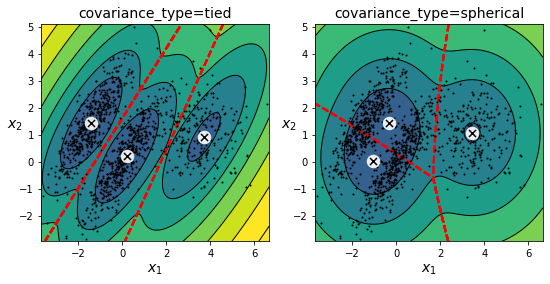

In [110]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

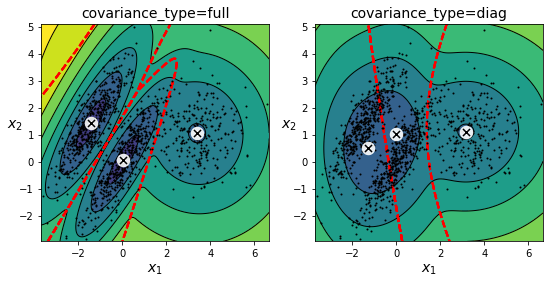

In [111]:
compare_gaussian_mixtures(gm_full, gm_diag, X)

## Anomaly Detection using Gaussian Mixtures
- Gaussian Mixtures can be used for anomaly detection: **instances located in low-density regions** can be considered **anomalies**.
- You must define what **density threshold** you want to use.

In [112]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

(-2.948604775181289, 5.1)

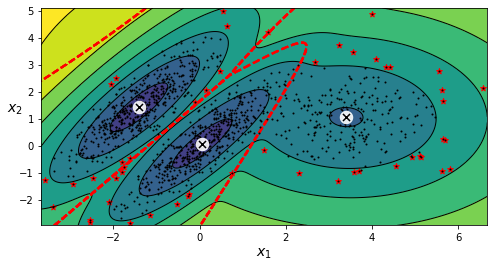

In [113]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

## Model Selection (selecting the number of clusters)
- We cannot use the inertia or the sihoutte score because they both assume that the clusters are spherical.
- Instead, we can try to find the model that minimizes a theoretical information such as the **Bayesian Information Criterion (BIC)** or the **Akaike Information Criterion (AIC)**.
    - $BIC = log(m) - 2log(\hat{L})$
    - $AIC = 2p - 2log(\hat{L})$
        - $m$ is the number of instances
        - $p$ is the number of parameters learned by the model
        - $\hat{L}$ is the maximized value of the likelihood function of the model.
            - This is the conditional probability of the observed data X, given the model and its optimized parameters.
- Both BIC and AIC penalize models that have more parameters to learn (e.g. more clusters), and reward models that fit the data well (i.e. models that give a high likelihood to the observed data).

In [114]:
gm.bic(X)

8189.733705221635

In [115]:
gm.aic(X)

8102.508425106597

- Let's train Gaussian Mixture models with various values of $k$ and measure their BIC.

In [116]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X) for k in range(1, 11)]

In [117]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

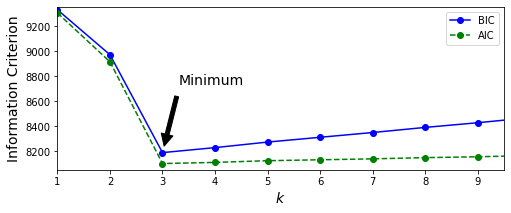

In [118]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, 'bo-', label='BIC')
plt.plot(range(1, 11), aics, 'go--', label='AIC')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Information Criterion', fontsize=14)
plt.axis([1, 9.5, np.min(aics)-50, np.max(aics)+50])

plt.annotate('Minimum', xy=(3, bics[2]), xytext=(0.35, 0.6),textcoords='figure fraction', fontsize=14, 
            arrowprops=dict(facecolor='black', shrink=0.1))
plt.legend()

- Let's search for the best combination of values for both the number of clusters and the `covariance_type` hyperparameter.

In [119]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ('full', 'tied', 'spherical', 'diag'):
        bic = GaussianMixture(n_components=k, n_init=10, covariance_type=covariance_type, random_state=42).fit(X).bic(X)
        
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [120]:
best_k, best_covariance_type

(3, 'full')

- Try use `GridSearchCV`.

In [121]:
from sklearn.model_selection import GridSearchCV

params = {'n_components': list(range(1, 11)), 'covariance_type': ('full', 'tied', 'spherical', 'diag')}
grid_search_cv = GridSearchCV(GaussianMixture(n_init=10, random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   11.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GaussianMixture(covariance_type='full',
                                       init_params='kmeans', max_iter=100,
                                       means_init=None, n_components=1,
                                       n_init=10, precisions_init=None,
                                       random_state=42, reg_covar=1e-06,
                                       tol=0.001, verbose=0,
                                       verbose_interval=10, warm_start=False,
                                       weights_init=None),
             iid='deprecated', n_jobs=None,
             param_grid={'covariance_type': ('full', 'tied', 'spherical',
                                             'diag'),
                         'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [122]:
grid_search_cv.best_params_

{'covariance_type': 'spherical', 'n_components': 1}

## Bayesian Gaussian Mixture Models
- Rather than manually searching for the optimal number of clusters ($k$), it is possible to use instead the **`BayesianGaussianMixture`** class, which is capable of **giving weights equal (or close) to zero** to unnecessary clusters.
    - Just set the number of components to a value that you believe is greater than the optimal number of clusters, and the algorithem will eliminate the unnecessary clusters automatically.

In [123]:
from sklearn.mixture import BayesianGaussianMixture

In [124]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

/Users/yuangchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

- We can check that the algorithm automatically detected that only 3 components are needed.

In [125]:
np.round(bgm.weights_, 2)

array([0.4 , 0.  , 0.  , 0.  , 0.39, 0.2 , 0.  , 0.  , 0.  , 0.  ])

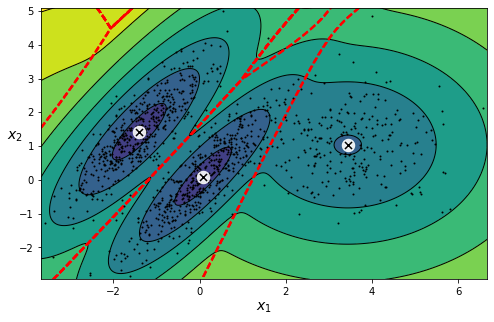

In [126]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)

- We may have a prior belief that the clusters are likely to be few (low concentration), or conversely, that they are more likely to be plentiful (high concentration). 
    - This can be adjusted using the `weight_concentration_prior` hyperparameter.

In [127]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1, weight_concentration_prior=0.01, 
                                  random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1, weight_concentration_prior=10000, 
                                  random_state=42)

nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=1000, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=1,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=10000,
                        weight_concentration_prior_type='dirichlet_process')

In [128]:
np.round(bgm_low.weights_, 2), np.round(bgm_high.weights_, 2)

(array([0.49, 0.51, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]),
 array([0.43, 0.01, 0.01, 0.11, 0.01, 0.01, 0.01, 0.37, 0.01, 0.01]))

Text(0.5, 1.0, 'weight_concentration_prior = 10000')

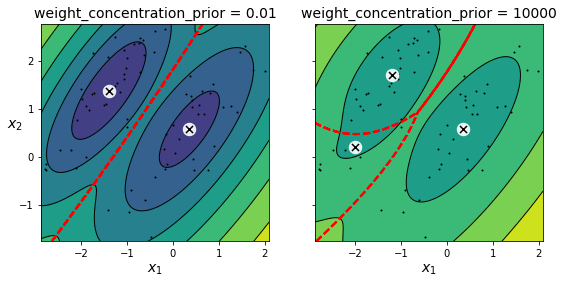

In [129]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

- Gaussian mixture models work great on clusters with ellipsoidal shapes, but if you try to fit a dataset with different shapes, you may have bad surprises. 
- For example, let’s see what happens if we use a Bayesian Gaussian mixture model to cluster the moons dataset.

In [130]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [131]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

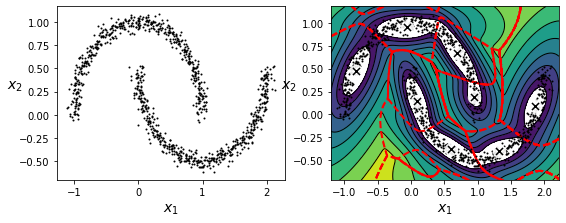

In [172]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons)

- Oops, not great... instead of detecting 2 moon-shaped clusters, the algorithm detected 8 ellipsoidal clusters.
- However, the density plot does not look too bad, so it might be usable for anomaly detection.

# Exercises

## 10. Cluster the Olivetti Faces Dataset
- The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. 
- Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. 
- Load the dataset using the `sklearn.datasets.fetch_olivetti_faces()` function.

In [133]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [134]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [135]:
olivetti.data.shape

(400, 4096)

In [136]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

- Then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). 
- Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set.

In [137]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [138]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


- To speed things up, we reduce the dataset's dimensionality using PCA.

In [139]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

In [140]:
pca.n_components_

199

- Next, we cluster the images using K-Means, and ensure that you have a good number of clusters.

In [141]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_pca) for k in k_range]

In [142]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]

best_idx = np.argmax(silhouette_scores)
best_k = k_range[best_idx]
best_score = silhouette_scores[best_idx]

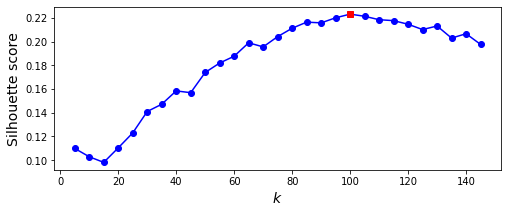

In [143]:
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.plot(best_k, best_score, 'rs')

In [144]:
best_k

100

- Now, let's take a look at inertia.

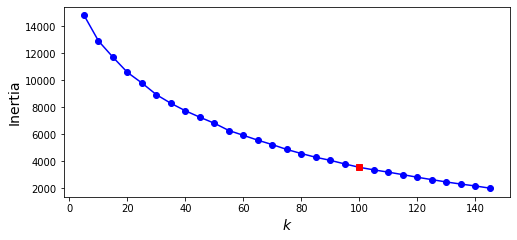

In [145]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_idx]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.plot(best_k, best_inertia, 'rs')

- In order to keep consistent with the official notebook, let's pick $k=120$.

In [146]:
best_model = kmeans_per_k[23]

In [147]:
best_model.n_clusters

120

- Now, let's visualize the clusters.

In [148]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

# for cluster_id in np.unique(best_model.labels_):
#     print("Cluster", cluster_id)
#     in_cluster = best_model.labels_==cluster_id
#     faces = X_train[in_cluster].reshape(-1, 64, 64)
#     labels = y_train[in_cluster]
#     plot_faces(faces, labels)

- About 2 out of 3 clusters are useful: that is, they contain at least 2 pictures, all of the same person. 
- However, the rest of the clusters have either one or more intruders, or they have just a single picture.
    - Clustering images this way may be too imprecise to be directly useful when training a model (as we will see below), but it can be tremendously useful when labeling images in a new dataset: it will usually make labelling much faster.

## 11. Using Clustering as Preprocessing for Classification
- Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.

In [149]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)

clf.fit(X_train, y_train)
clf.score(X_valid, y_valid)

0.9375

- Now, use K-Means as a dimensionality reduction tool, and train the classifier on the reduced set.

In [150]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

In [151]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
clf.score(X_valid_reduced, y_valid)

0.775

- That's not better at all! 
- Let's see if tuning the number of clusters helps.
- Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach?
    - We could use a `GridSearchCV` like we did earlier in this notebook, but since we already have a validation set, we don't need K-fold cross-validation, and we're only exploring a simple hyperparameter, so it's easier to just run a loop manually.

In [152]:
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
    pipeline = Pipeline([
        ('kmeans', KMeans(n_clusters=n_clusters, random_state=42)),
        ('forest_clf', RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.4125
10 0.525
15 0.5375
20 0.6375
25 0.65
30 0.6375
35 0.675
40 0.7375
45 0.725
50 0.75
55 0.7375
60 0.725
65 0.7375
70 0.725
75 0.725
80 0.775
85 0.7375
90 0.7375
95 0.75
100 0.75
105 0.75
110 0.7375
115 0.7375
120 0.775
125 0.7875
130 0.725
135 0.75
140 0.7625
145 0.7375


- Try use `GridSearchCV`.

In [153]:
pipeline = Pipeline([
        ('kmeans', KMeans(n_clusters=120, random_state=42)),
        ('forest_clf', RandomForestClassifier(n_estimators=150, random_state=42))
    ])

params = {'kmeans__n_clusters': k_range}

grid_clf = GridSearchCV(pipeline, params, cv=3, verbose=2)
grid_clf.fit(X_train_pca, y_train)

Fitting 3 folds for each of 29 candidates, totalling 87 fits
[CV] kmeans__n_clusters=5 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=5, total=   0.3s
[CV] kmeans__n_clusters=5 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=5, total=   0.3s
[CV] kmeans__n_clusters=5 ............................................
[CV] ............................. kmeans__n_clusters=5, total=   0.3s
[CV] kmeans__n_clusters=10 ...........................................
[CV] ............................ kmeans__n_clusters=10, total=   0.3s
[CV] kmeans__n_clusters=10 ...........................................
[CV] ............................ kmeans__n_clusters=10, total=   0.3s
[CV] kmeans__n_clusters=10 ...........................................
[CV] ............................ kmeans__n_clusters=10, total=   0.3s
[CV] kmeans__n_clusters=15 ...........................................
[CV] ............................ kmeans__n_clusters=15, total=   0.3s
[CV] kmeans__n_clusters=15 ...........................................
[CV] ............................ kmeans__n_clusters=15, total=   0.3s
[CV] kmeans__n_clusters=15 ...........................................
[CV] .

[CV] ........................... kmeans__n_clusters=100, total=   0.8s
[CV] kmeans__n_clusters=105 ..........................................
[CV] ........................... kmeans__n_clusters=105, total=   0.8s
[CV] kmeans__n_clusters=105 ..........................................
[CV] ........................... kmeans__n_clusters=105, total=   0.8s
[CV] kmeans__n_clusters=105 ..........................................
[CV] ........................... kmeans__n_clusters=105, total=   0.8s
[CV] kmeans__n_clusters=110 ..........................................
[CV] ........................... kmeans__n_clusters=110, total=   0.8s
[CV] kmeans__n_clusters=110 ..........................................
[CV] ........................... kmeans__n_clusters=110, total=   0.8s
[CV] kmeans__n_clusters=110 ..........................................
[CV] ........................... kmeans__n_clusters=110, total=   0.9s
[CV] kmeans__n_clusters=115 ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:   58.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=120, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('forest_clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion=

In [154]:
grid_clf.best_params_

{'kmeans__n_clusters': 145}

In [155]:
grid_clf.best_estimator_.fit(X_train_pca, y_train)
grid_clf.best_estimator_.score(X_valid_pca, y_valid)

0.7375

- Now, what if we append the features from the reduced set to the orginal features?

In [156]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [157]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)

clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.825

In [158]:
clf.score(X_test_extended, y_test)

0.8

- That's a bit better, but still worse than without the cluster features. 
- The clusters are not useful to directly train a classifier in this case (but they can still help when labelling new training instances).

## 12. Gaussian Mixture Model for the Olivetti Faces Dataset
- Train a Gaussian Mixture Model on the Olivetti faces dataset.
- To speed up the algorithm, you should reduce the dataset's dimensionality.

In [159]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [160]:
y_pred

array([26, 11,  9, 34,  7, 21, 21,  7, 36, 30, 38, 28, 33, 39, 21, 24, 21,
       33,  8, 30,  1, 32, 11, 14,  1,  5, 33,  1, 23,  6, 30, 30, 37,  6,
       12, 35, 21, 24, 36, 20, 16,  0,  9, 12,  8,  9, 29, 32, 22,  7, 15,
       36, 10,  2,  1,  7, 10, 15, 23,  2, 19, 36,  7, 13, 20, 30, 14, 18,
       37, 32,  2, 23, 27,  6, 28, 18, 22, 13, 10, 27, 17,  6, 25, 36, 29,
       30, 26,  4, 32, 22, 16, 30,  6, 31,  2, 13, 36, 34,  1,  2, 21, 20,
       38, 18, 11,  4, 37, 38, 11, 22, 21, 34, 27,  7, 37, 36, 37, 17, 35,
       19, 10,  9, 14,  7,  2, 21, 36,  4,  4, 19, 11,  3, 21,  1,  8, 13,
        6, 10, 30, 20, 31, 21,  2,  2, 15, 12, 33,  7, 21, 38,  9,  2, 16,
       37,  2, 33, 18,  8, 38, 24, 12,  4,  5, 19, 15, 19, 36, 29,  7, 38,
       36, 32,  8,  5, 29, 12,  5, 31, 28, 25, 22, 23, 38, 22, 21,  2,  8,
        5, 18, 30,  4, 10,  2, 32, 36,  1, 25,  7, 12, 21, 12,  7, 13, 16,
        5,  1, 17,  4,  1, 12, 23, 36,  3, 33, 23, 12, 18, 28,  0, 33, 31,
        6, 14,  4, 22, 38

- Use the model to generate some new faces (using the `sample()` method), and visualize them.

In [161]:
n_gen_faces = 20

gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

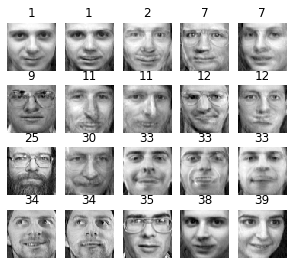

In [162]:
plot_faces(gen_faces, y_gen_faces)

- Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the `score_samples()` method for normal images and for anomalies).

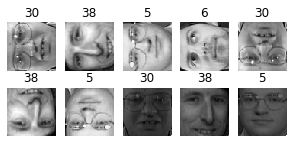

In [163]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
darkened = darkened.reshape(-1, 64*64)
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [164]:
X_bad_faces_pca = pca.transform(X_bad_faces)

gm.score_samples(X_bad_faces_pca)

array([-1.79997580e+07, -2.26427466e+07, -3.96415819e+07, -4.60254428e+07,
       -3.13975466e+07, -1.39330076e+07, -2.90883006e+07, -1.06298513e+08,
       -1.20930905e+08, -7.49739465e+07])

In [165]:
gm.score_samples(X_train_pca[:10])

array([1163.02020802, 1149.16682413, 1148.47710457, 1170.6760278 ,
       1088.46009825, 1075.71700282, 1075.71700717, 1088.46009201,
       1096.42609691, 1119.68627032])

## 13. Use Dimensionality Reduction Techniques for Anomaly Detection
- Some dimensionality reduction techniques can also be used for anomaly detection. 
- For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. 
- Then compute the reconstruction error for each image. 
- Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is. 
    - If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.

In [166]:
X_train_pca

array([[ 3.78081584e+00, -1.85477579e+00, -5.14402580e+00, ...,
        -1.35641083e-01, -2.14069068e-01,  6.11860305e-02],
       [ 1.01488495e+01, -1.52754033e+00, -7.66988456e-01, ...,
         1.23930134e-01, -1.35273740e-01, -2.32684407e-02],
       [-1.00152874e+01,  2.87729359e+00, -9.19888377e-01, ...,
         7.26140663e-02, -2.96539254e-03,  1.24884278e-01],
       ...,
       [ 2.47586823e+00,  2.95597291e+00,  1.29985106e+00, ...,
        -2.09059026e-02,  3.48681323e-02, -1.54332668e-01],
       [-3.22032094e+00,  5.34897900e+00,  1.39426935e+00, ...,
         5.75391091e-02, -2.28321195e-01,  1.55569628e-01],
       [-9.22876894e-01, -3.64702988e+00,  2.26088190e+00, ...,
         1.36849329e-01, -6.91437572e-02,  6.26967847e-02]], dtype=float32)

In [167]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [168]:
reconstruction_errors(pca, X_train).mean()

0.00019205351

In [169]:
reconstruction_errors(pca, X_bad_faces).mean()

0.004707354

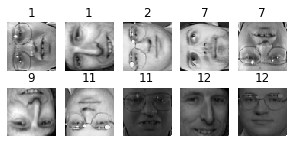

In [170]:
plot_faces(X_bad_faces, y_gen_faces)

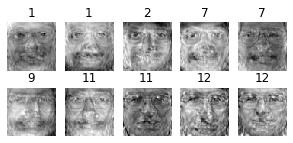

In [171]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_gen_faces)